In [ ]:
!gdown 11iTI9YpShmEkMHMzj4sERn8Fs4Cpty7N

Downloading...
From (original): https://drive.google.com/uc?id=11iTI9YpShmEkMHMzj4sERn8Fs4Cpty7N
From (redirected): https://drive.google.com/uc?id=11iTI9YpShmEkMHMzj4sERn8Fs4Cpty7N&confirm=t&uuid=9a4a710f-f3f4-46cf-aace-71bccb0a1347
To: /content/Medical_Corpus.jsonl
100% 757M/757M [00:15<00:00, 48.1MB/s]


In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [ ]:
def read_jsonl_file(jsonl_file):
    valid_records = []
    with open(jsonl_file, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            json_object = json.loads(line)
            valid_records.append(json_object)
    df = pd.DataFrame(valid_records)
    return df

In [ ]:
df = read_jsonl_file("./Medical_Corpus.jsonl")

In [ ]:
sources = set()
for index,row in df.iterrows():
    sources.add(row['source'])
print(sources)

{'https://niniban.com', 'https://www.hidoctor.ir', 'https://extern.ir', 'https://seebmagazine.com', 'https://www.paziresh24.com', 'https://salammag.com', 'https://doctoreto.com', 'https://www.darmankade.com', 'https://majalepezeshki.ir', 'https://nabz.site', 'https://hamrah-teb.com'}


In [ ]:
print(len(sources))

11


In [ ]:
sources = ['https://niniban.com', 'https://www.hidoctor.ir', 'https://extern.ir', 'https://seebmagazine.com', 'https://www.paziresh24.com', 'https://salammag.com', 'https://doctoreto.com', 'https://www.darmankade.com', 'https://majalepezeshki.ir', 'https://nabz.site', 'https://hamrah-teb.com']
accumulators = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for index,row in df.iterrows():
    source = row['source']
    if source == 'https://niniban.com':
       accumulators[0] += 1
    elif source == 'https://www.hidoctor.ir':
       accumulators[1] += 1
    elif source == 'https://extern.ir':
       accumulators[2] += 1
    elif source == 'https://seebmagazine.com':
       accumulators[3] += 1
    elif source == 'https://www.paziresh24.com':
       accumulators[4] += 1
    elif source == 'https://salammag.com':
       accumulators[5] += 1
    elif source == 'https://doctoreto.com':
       accumulators[6] += 1
    elif source == 'https://www.darmankade.com':
       accumulators[7] += 1
    elif source == 'https://majalepezeshki.ir':
       accumulators[8] += 1
    elif source == 'https://nabz.site':
       accumulators[9] += 1
    elif source == 'https://hamrah-teb.com':
       accumulators[10] += 1


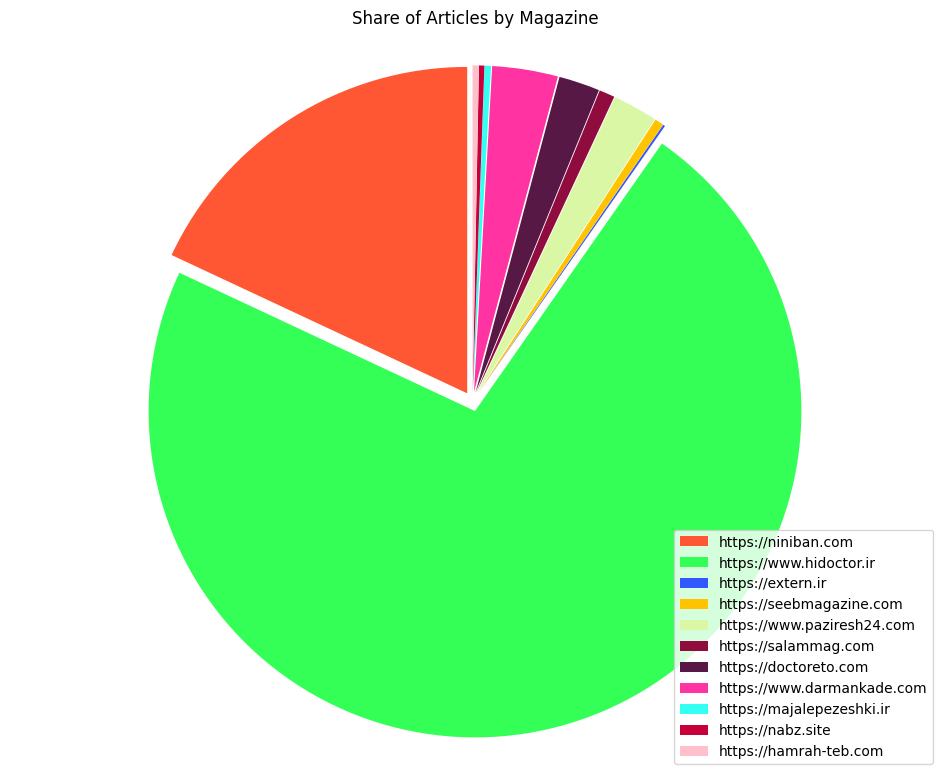

In [ ]:
colors = [
    '#FF5733',  # Coral Red
    '#33FF57',  # Lime Green
    '#3357FF',  # Bright Blue
    '#FFC300',  # Gold
    '#DAF7A6',  # Light Green
    '#900C3F',  # Dark Pink
    '#581845',  # Dark Purple
    '#FF33A1',  # Hot Pink
    '#33FFF3',  # Turquoise
    '#C70039',  # Crimson
    '#FFC0CB',  # Light Pink
    '#FFB300'   # Amber
]
explode = (0.03,) * len(accumulators)
plt.figure(figsize=(10*1.2, 8*1.2))
plt.pie(accumulators, autopct=None, startangle=90, explode=explode,colors =colors)
plt.legend(sources, loc="best")
plt.title('Share of Articles by Magazine')
plt.axis('equal')
plt.show()

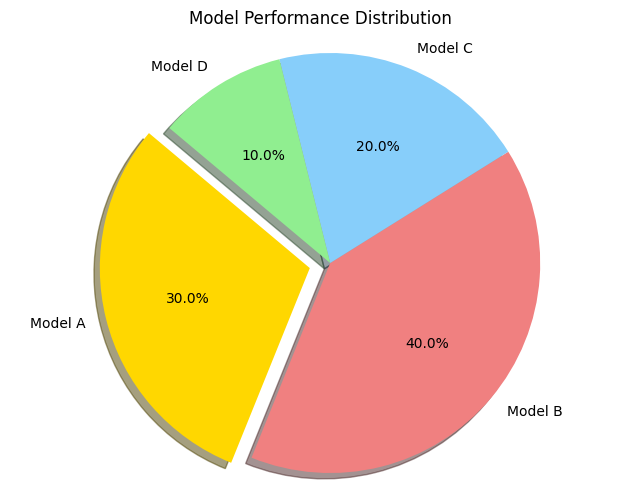

In [4]:
import matplotlib.pyplot as plt

# Data to plot
labels = ['Model A', 'Model B', 'Model C', 'Model D']
sizes = [30, 40, 20, 10]  # Corresponding sizes for each label
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']  # Colors for each section
explode = (0.1, 0, 0, 0)  # explode the 1st slice (Model A)

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie chart is a circle
plt.axis('equal')
plt.title('Model Performance Distribution')
plt.show()

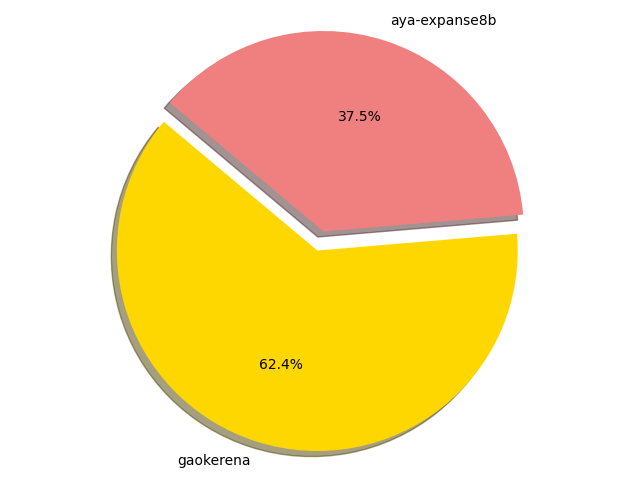

In [7]:
import matplotlib.pyplot as plt

# Data to plot
labels = ['gaokerena', 'aya-expanse8b']
sizes = [6245,3755]  # Corresponding sizes for each label
colors = ['gold', 'lightcoral']  # Colors for each section
explode = (0, 0.1)  # explode the 1st slice (Model A)

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie chart is a circle
plt.axis('equal')
plt.show()